In [1]:
# Exploratory Data Analysis

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Customer-Churn-Records.csv')

## 1.- Basic Data Overview

In [5]:
print('Data shape:', data.shape)

Data shape: (10000, 18)


In [6]:
print('Dataset info: ')
data.info()

Dataset info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int

In [69]:
print('Descriptive statistics: ')
round(data.describe().T,2)

Descriptive statistics: 


,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48
Exited,10000.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00
Complain,10000.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00


In [8]:
round(3.56568,2)

3.57

## 2.- Missing Values

In [10]:
# Check missing values summary
missing_values = data.isnull().sum()
print('Missing values per column:')
print(missing_values)

Missing values per column:
RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

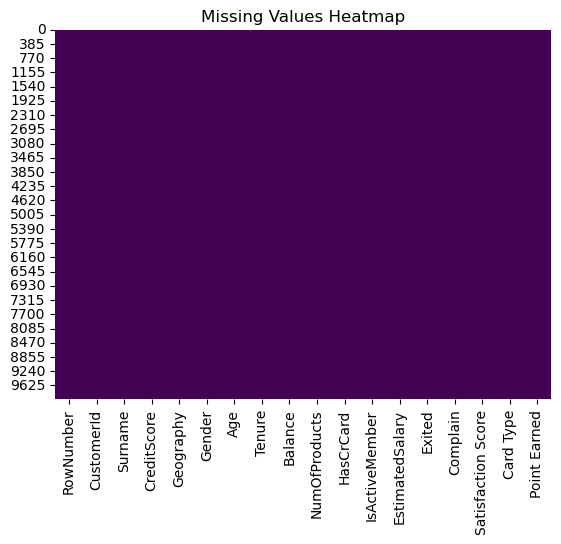

In [11]:
# Missing values heatmap / notice that there isn't missing values,heatmap is an excellent tool to check for missing values visually
# here we have a solid color due to this DataFrame doesn't have any missing values
sns.heatmap(data.isnull(), cbar = False, cmap= 'viridis')
plt.title('Missing Values Heatmap')
plt.show

## 3.- Target Variable Distribution

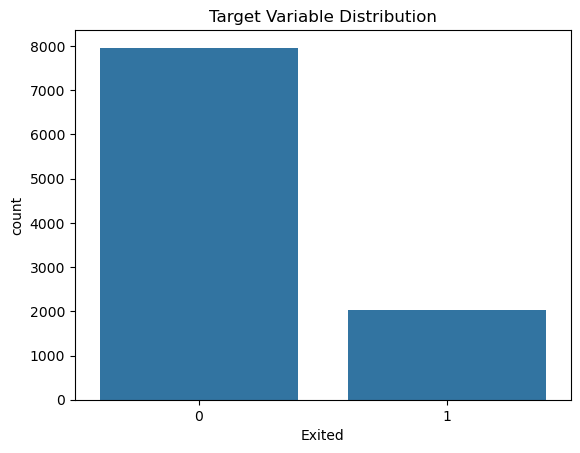

In [49]:
# we could see that this target variable is unbalanced, this needs to be addressed in the data preprocessing stage
sns.countplot(data,x = 'Exited')
plt.title('Target Variable Distribution')
plt.show()

In [14]:
# using method .value_counts()     notice: this target variable is unbalanced
data['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

## 4.- Numerical Features

In [17]:
# lets first drop columns 'RowNumber','CustomerId'
data = data.drop(['RowNumber','CustomerId','Surname'],axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [18]:
# Identifying Numerical Columns: using method .select_dtypes()   and funtion .columns 
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:", numerical_cols)


Numerical columns: Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Point Earned'],
      dtype='object')


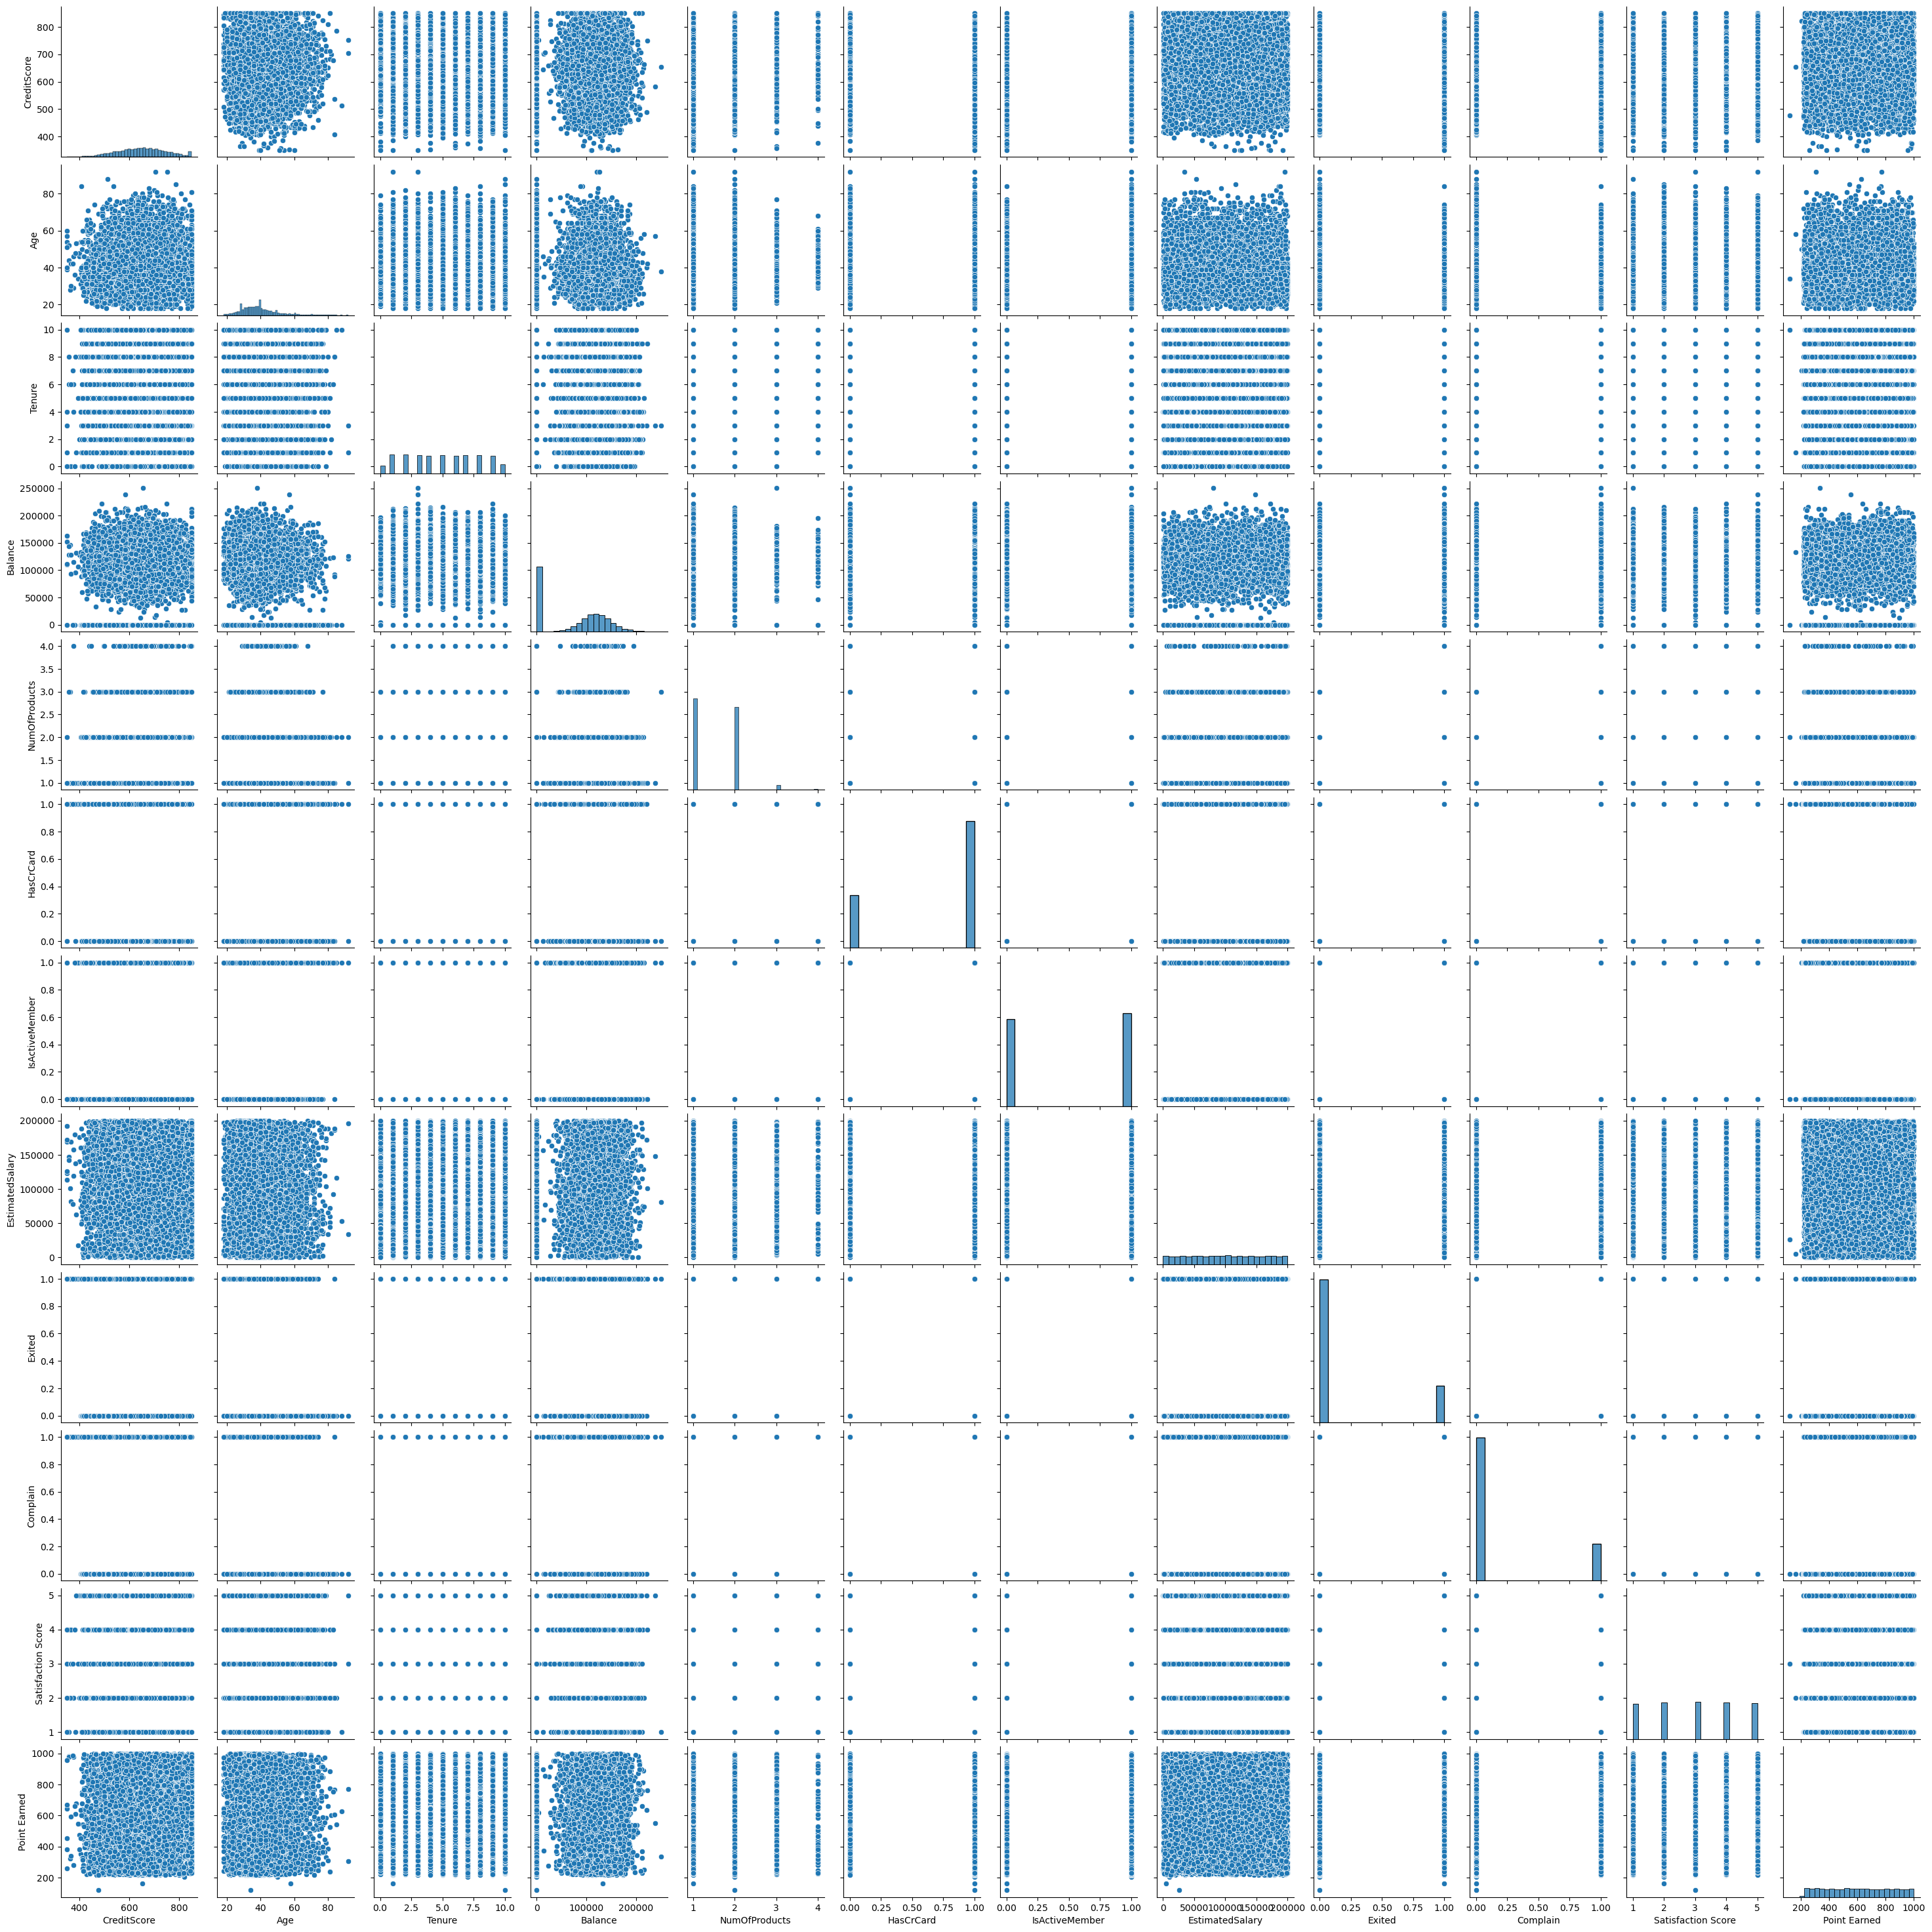

In [19]:
# pairplot help to reveal relationships or clusters among features / when the data have lots of features pairplot maybe is not 
# the best option to show distribution of the features.
sns.pairplot(data[numerical_cols])
plt.show()

In [59]:
data_cols = data.columns

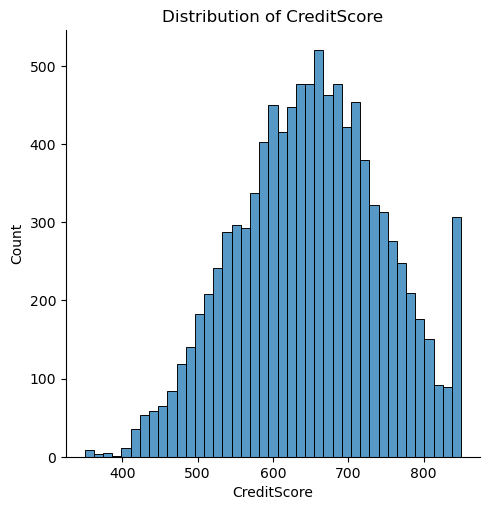

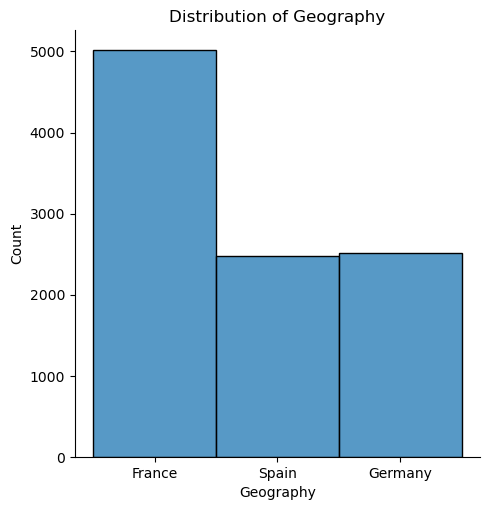

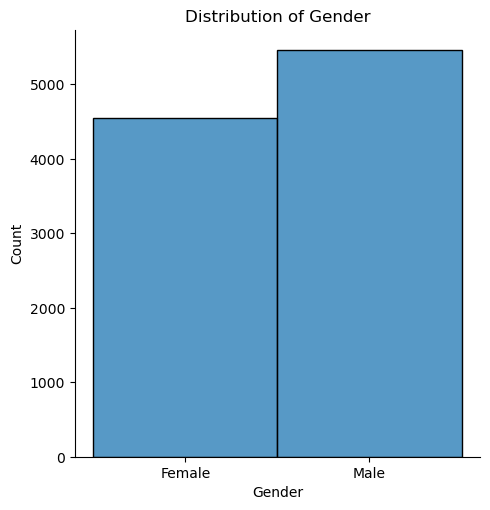

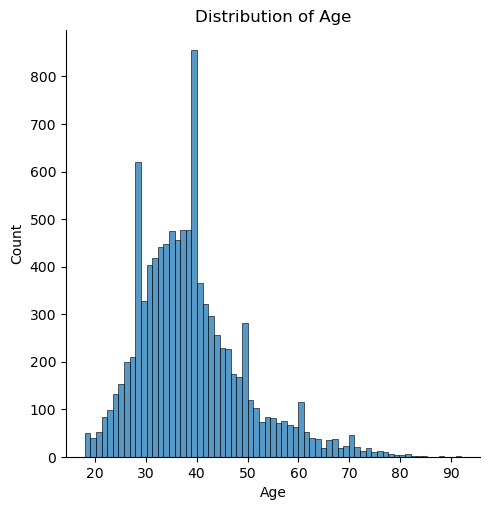

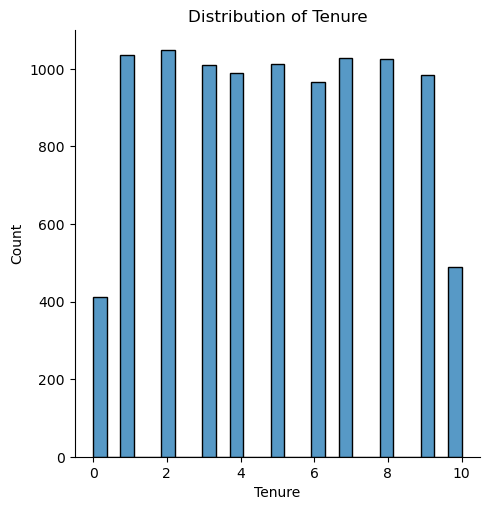

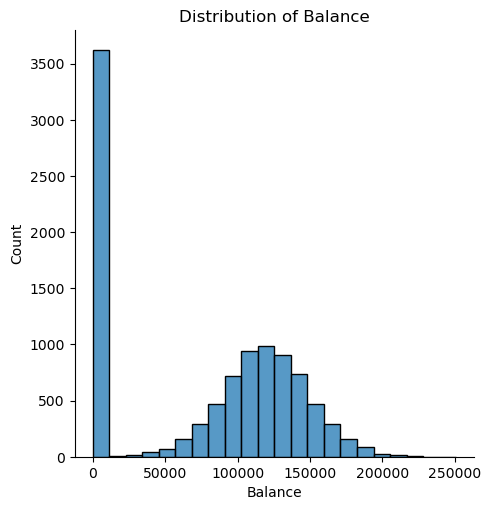

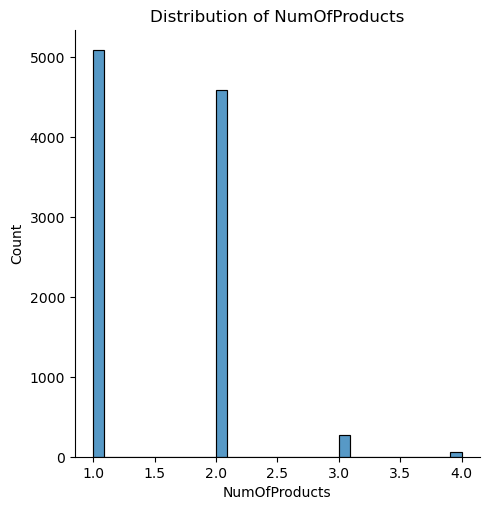

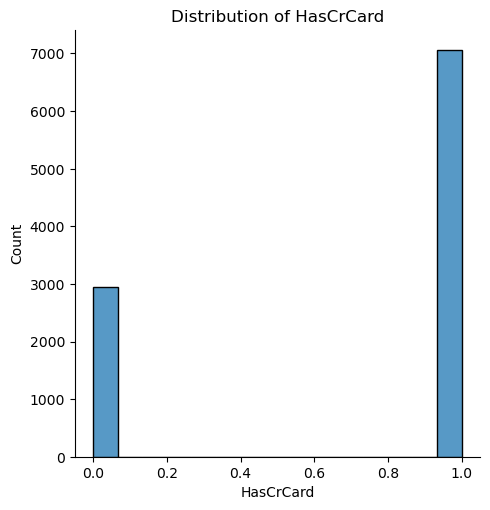

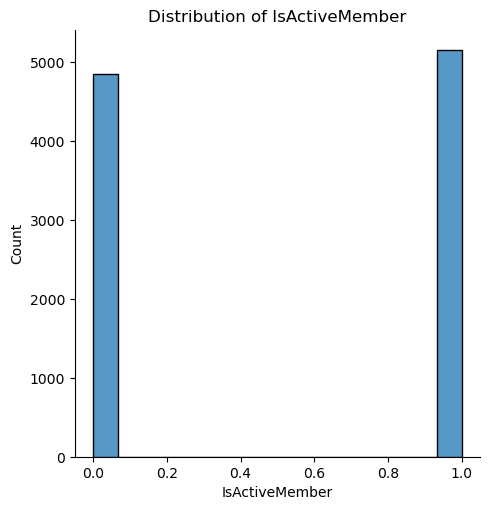

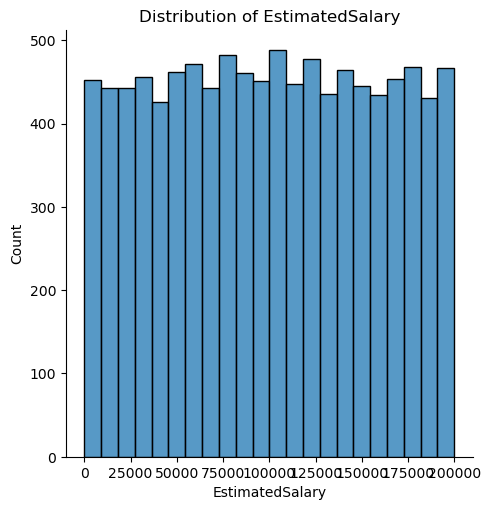

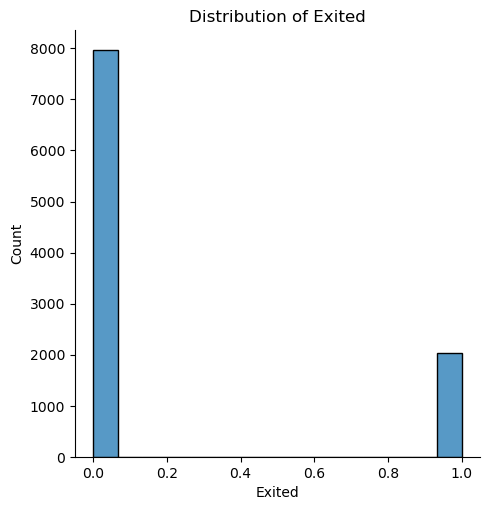

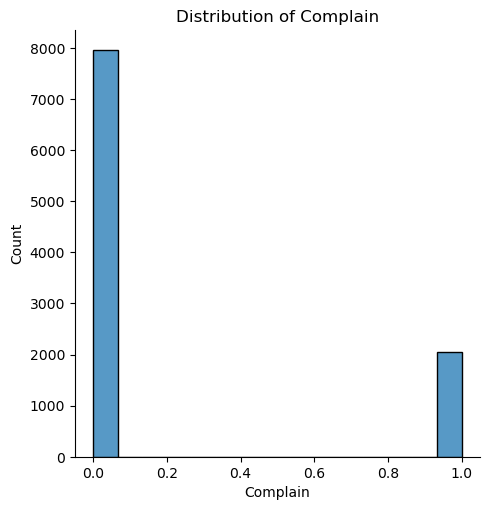

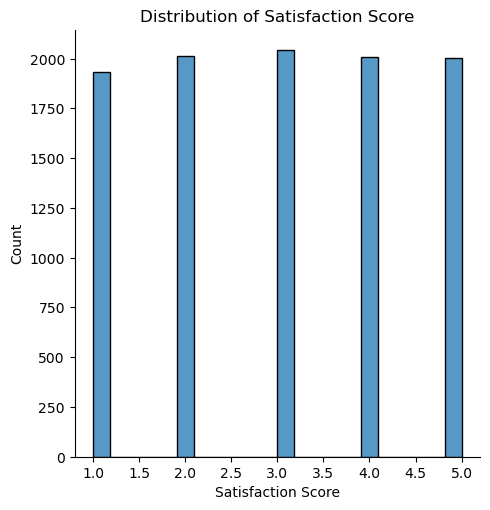

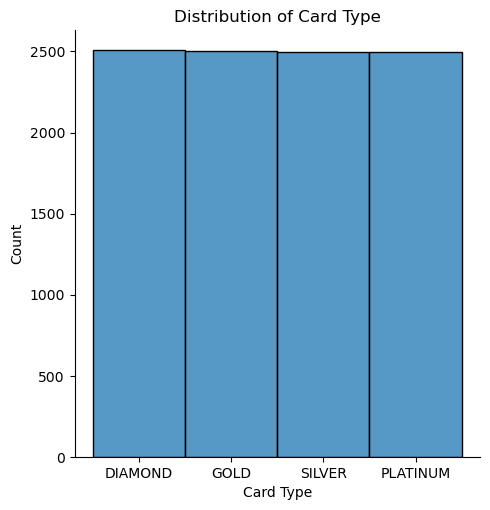

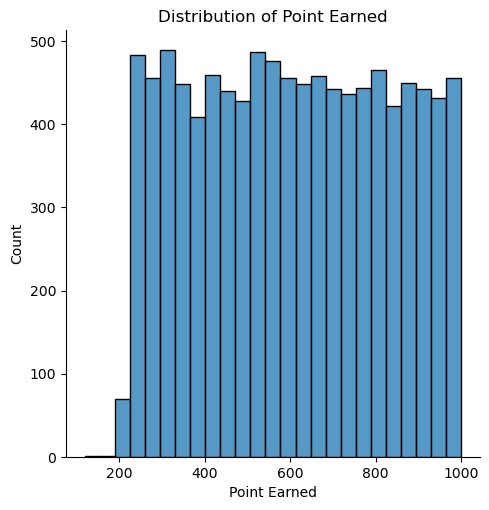

In [63]:
# using Seaborn methods  displot() or histplot() / could be a good idea to graph separatly in order to further customize the
# seaborn visualization

for col in data_cols:
    sns.displot(data, x= data[col])
    plt.title(f'Distribution of {col}')
    plt.show()

In [20]:
# correlation matrix, using method .corr(), notice that high correlation close to 1 or -1 might indicate redundancy

corr_matrix = data[numerical_cols].corr()
print(corr_matrix)


                    CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore            1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                   -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure                 0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance                0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts          0.012238 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard             -0.005458 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember         0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary       -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited                -0.026771  0.285296 -0.013656  0.118577      -0.047611   
Complain              -0.027048  0.283530 -0.013047  0.119124      -0.046357   
Satisfaction Score    -0.012599 -0.000876  0.008663 -0.002588      -0.011394   
Point Earned           0.000077  0.00222

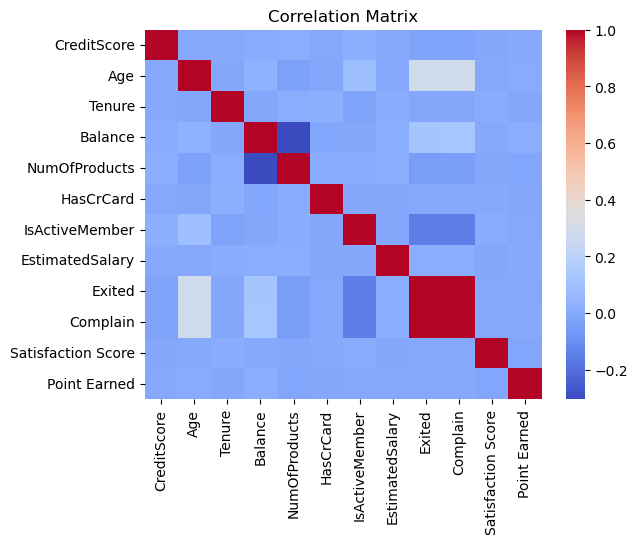

In [21]:
# annot=True write the data value in each cell
sns.heatmap(corr_matrix,annot = False,cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 5.- Categorical Features

In [23]:
# Identifying categorical features, data type 'object', during the data upload and data cleaning make sure that all features
# are define correctly
categorical_cols = data.select_dtypes(include=['object']).columns
print('Categorical columns: ', categorical_cols)

Categorical columns:  Index(['Geography', 'Gender', 'Card Type'], dtype='object')


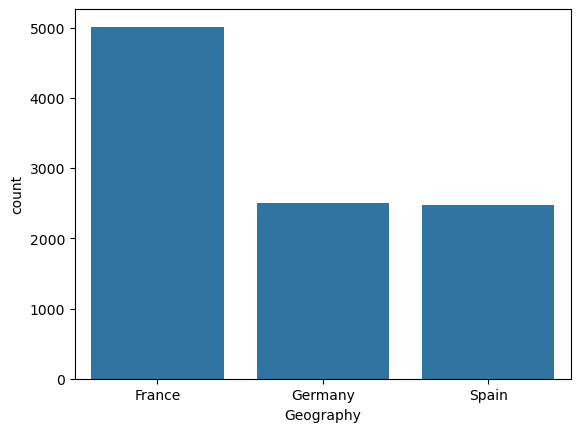

In [24]:
# categorical variables distribution,

sns.countplot(data,x='Geography', order= data['Geography'].value_counts().index)
plt.show()

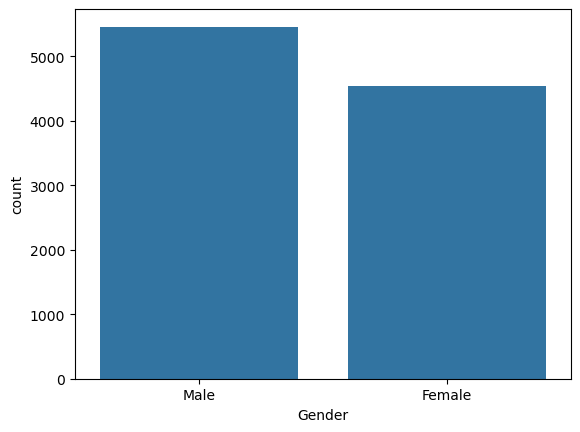

In [25]:
sns.countplot(data,x='Gender', order= data['Gender'].value_counts().index)
plt.show()

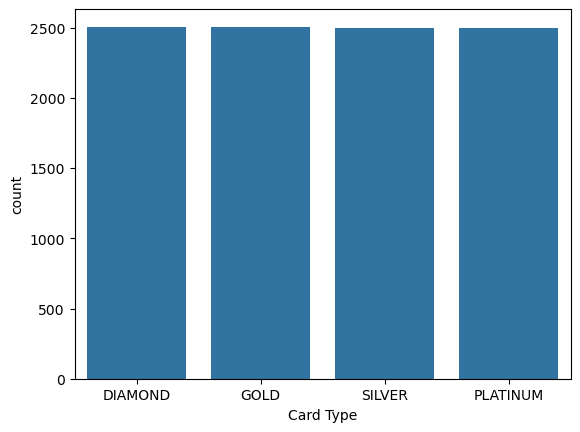

In [26]:
sns.countplot(data,x='Card Type', order= data['Card Type'].value_counts().index)
plt.show()

## Remarks
- Target  Variable is unbalance, correct
- Features distribution visualization show, that France is the most common country in our dataset, credit score has a significant
  amount of customers in the 800+ range( see the spike in the distribution of credit score), age is lighly skewed to the right mean   38.93, median = 37
- There is no evidence of correlation among the features, except Exited with Complain equal to .99, it is almost that Complain is a redundance of the target variable and it is recommended to be drop it
- From this initial .corr() analysis Age, Active Member and Balance are the features that are close to the target variable in comparison with the other features.